In [3]:
 #slip 19
#Q2. Write a python program to implement multiple Linear Regression modelfor a car dataset. Dataset can be downloaded from: ( https://www.w3schools.com/python/python_ml_multiple_regression.asp )
#( https://www.kaggle.com/datasets/swapnil1894/multiple-regression )
#import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV
data = pd.read_csv("C:/Users/HP/Downloads/1.02.Multiplelinearregression.csv")

# Check the columns in the DataFrame
print(data.columns)

# Replace 'SAT', 'Rand' with the correct feature columns if they differ
X = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Index(['SAT', 'GPA', 'Rand 1,2,3'], dtype='object')
Mean Squared Error: 0.05766690113933144
R-squared: 0.417127123666891


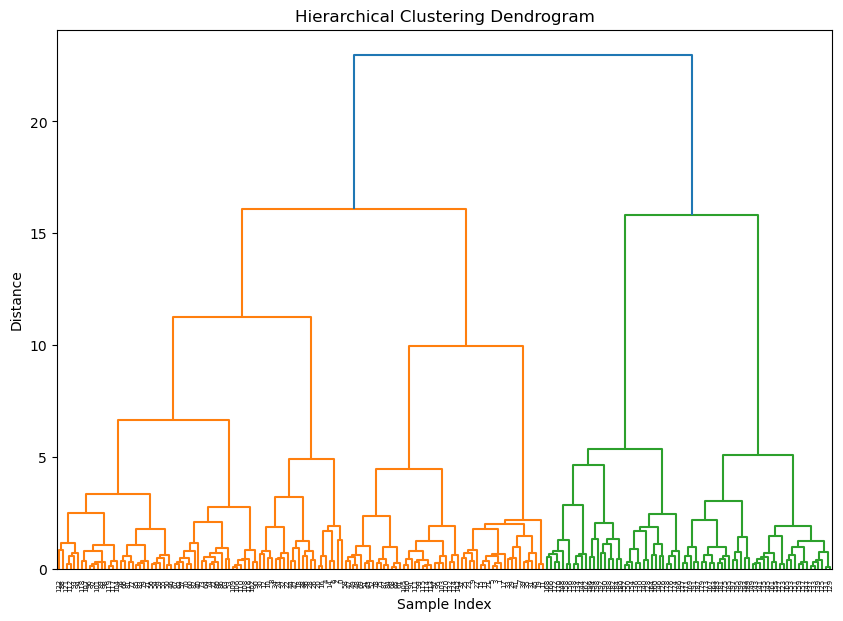

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1   19                  15                      39        1
1           2   21                  15                      81        2
2           3   20                  16                       6        1
3           4   23                  16                      77        2
4           5   31                  17                      40        1


In [7]:
#slip 20 
#
# Q2. Write a python program to implement hierarchical Agglomerative clusteringalgorithm. (Download Customer.csv dataset from github.com). 
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


data = pd.read_csv("C:/Users/HP/Downloads/customers.csv")

data = data.select_dtypes(include=[np.number])  # Select only numerical columns
data_scaled = StandardScaler().fit_transform(data)

linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

model = AgglomerativeClustering(n_clusters=3)  # Set the number of clusters
clusters = model.fit_predict(data_scaled)

data['Cluster'] = clusters
print(data.head())



In [ ]:
#slip 12
#Q2. Write a python program to implement multiple Linear Regression modelfor a car dataset. Dataset can be downloaded from: https://github.com/krishnaik06/Multiple-Linear-Regression/blob/master/50_Startups.csv 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv'
data = pd.read_csv(url)

le = LabelEncoder()
data['State'] = le.fit_transform(data['State'])

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(np.column_stack((y_pred, y_test)))


[[103959.40508021 103282.38      ]
 [132398.73236694 144259.4       ]
 [133529.03790148 146121.95      ]
 [ 72958.28368314  77798.83      ]
 [179534.78737166 191050.39      ]
 [115533.62584099 105008.31      ]
 [ 67476.95847883  81229.06      ]
 [ 98504.36199396  97483.56      ]
 [114789.16083781 110352.25      ]
 [168972.21909945 166187.94      ]]


In [4]:
#slip 13
#  Q2. Write a Python program to read “StudentsPerformance.csv” file. Solvefollowing: - To display the shape of dataset. - To display the top rows of the dataset with their columns.Note: Download dataset from following link : (https://github.com/rashida048/Datasets/blob/master/StudentsPerformance.csv )

#

In [8]:

import pandas as pd

url = 'https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv'
data = pd.read_csv(url)

print(data.shape)
print(data.head())


(1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [10]:
#slip 14
#. Write a Python Programme to apply Apriori algorithm on Groceries dataset. Dataset can be downloaded from (https://github.com/amankharwal/Website-data/blob/master/Groceries_dataset.csv ). Also display support and confidence for each rule.
#

In [14]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv'
data = pd.read_csv(url)

basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

print(rules[['antecedents', 'consequents', 'support', 'confidence']])


C:\Users\HP\AppData\Local\Temp\ipykernel_5448\466106712.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                 antecedents                     consequents  \
0                                 (UHT-milk)                 (bottled water)   
1                                 (UHT-milk)              (other vegetables)   
2                                 (UHT-milk)                     (pip fruit)   
3                                 (UHT-milk)                    (rolls/buns)   
4                                 (UHT-milk)               (root vegetables)   
...                                      ...                             ...   
5839  (rolls/buns, yogurt, other vegetables)              (soda, whole milk)   
5840              (soda, whole milk, yogurt)  (rolls/buns, other vegetables)   
5841          (soda, rolls/buns, whole milk)      (yogurt, other vegetables)   
5842              (soda, rolls/buns, yogurt)  (whole milk, other vegetables)   
5843        (rolls/buns, whole milk, yogurt)        (soda, other vegetables)   

       support  confidence  
0     0.02

In [32]:
#slip 15
#
# Q2. Write a Python program build Decision Tree Classifier forshows.
#csvfrom pandas and predict class label for show starring a 40 years old American comedian,
# with 10 years of experience, and a comedy ranking of 7? Create a csv file as shown in 
#https://github.com/mahesh147/Decision-Tree-Classifier/blob/master/Social_Network_Ads.csv  

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("C:/Users/HP/Downloads/Social_Network_Ads.csv")

X = data[['Age', 'EstimatedSalary', 'Gender']]
y = data['Purchased']

X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

clf = DecisionTreeClassifier()
clf.fit(X, y)

prediction = clf.predict([[40, 0, 1]])  # 40 years, EstimatedSalary set to 0, Male
print(f"Prediction: {prediction[0]}")


Prediction: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_5448\3855252730.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
# slip 16 
# Q2. Write a Python program build Decision Tree Classifier using Scikit-learnpackage for diabetes data set (download database from https://www.kaggle.com/uciml/pima-indiansdiabetes-database)
#https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/diabetes.csv 
#

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

url = 'https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/raw/master/diabetes.csv'
data = pd.read_csv(url)

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



In [44]:
pip install pandas numpy statsmodels matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# slip 17
#Q2. Write a python programme to implement multiple linear regression modelfor stock market data frame as follows: Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2 016,20,16,2016,2016,2016,2016,2016,2016,2016,2016,2016], 'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
 #  'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1 .75,1.75,1.75,1.75,1.75,1.75],
# 'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5 .9,6.2,6.2,6.1], 'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047, 965,943,958,971,949,884,866,876,822,704,719] } And draw a graph of stock market price verses interest rate.


                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           4.04e-11
Time:                        00:49:51   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

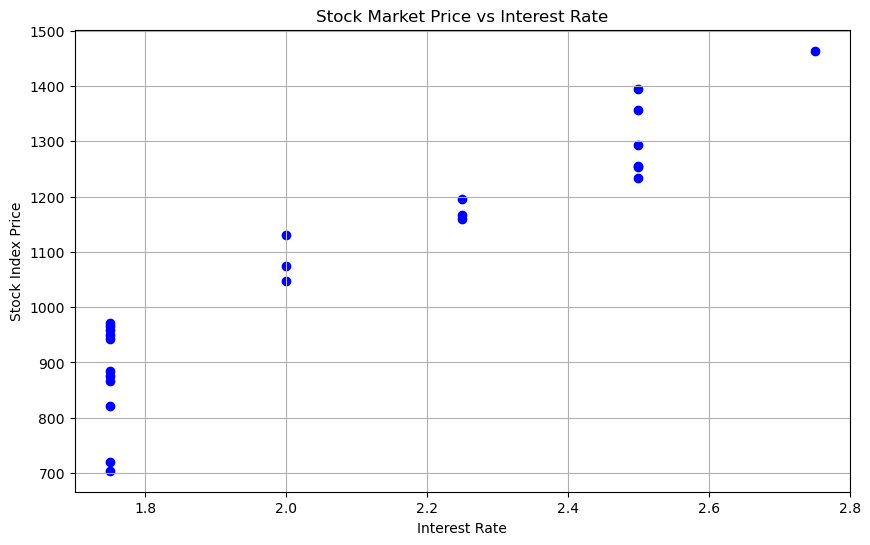

In [64]:

 import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

Stock_Market = {
    'Year': [2017]*12 + [2016]*12,
    'Month': list(range(12, 0, -1)) * 2,
    'Interest_Rate': [
        2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2, 
        2, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75
    ],
    'Unemployment_Rate': [
        5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9,
        6, 5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1
    ],
    'Stock_Index_Price': [
        1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 1075, 
        1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719
    ]
}

df = pd.DataFrame(Stock_Market)

X = df[['Interest_Rate', 'Unemployment_Rate']]
y = df['Stock_Index_Price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(10, 6))
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='blue')
plt.title('Stock Market Price vs Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.grid()
plt.show()


In [ ]:
#slip 18
#Q2. Consider the following observations/data. And apply simple linear regression and find out estimated coefficients b1 and b1 Also analyse theperformance of the model (Use sklearn package) x = np.array([1,2,3,4,5,6,7,8]) y = np.array([7,14,15,18,19,21,26,23])
#

Estimated coefficients:
b0 (intercept): 7.642857142857142
b1 (slope): 2.2738095238095237
Mean Squared Error: 3.4657738095238084
R^2 Score: 0.8867741072947811


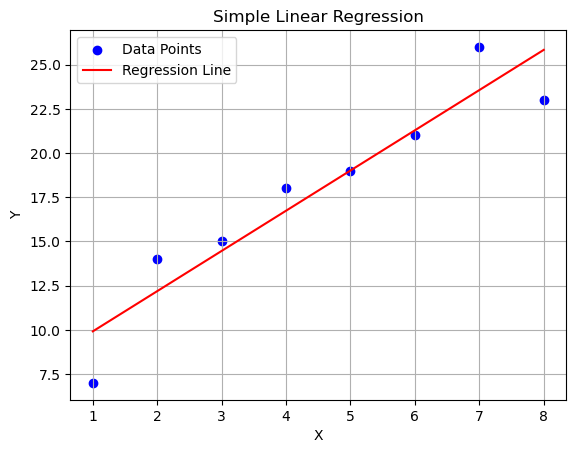

In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([7, 14, 15, 18, 19, 21, 26, 23])

model = LinearRegression()
model.fit(x, y)

b0 = model.intercept_
b1 = model.coef_[0]

y_pred = model.predict(x)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Estimated coefficients:')
print(f'b0 (intercept): {b0}')
print(f'b1 (slope): {b1}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

